In [88]:
# Model is: ln(prod,y / pop,y) = k+c1*y+c2*ln(GDP,y/Pop,y)+c3*ln(Prod,y-1/Pop,y-1)

# Q1. how to perform this using a python package
# Q2. how to perform regression over all 21 economies at the same time to generate 21 regressions?

# https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [90]:
data = pd.read_csv("04_CHL.csv")
data.head()

,year,GDP,Pop,Steel
0,1980,75244937.47,11178.81699,809000
1,1981,78802559.99,11348.44199,724000
2,1982,70661594.54,11527.27403,334000
3,1983,67980358.79,11714.44195,462000
4,1984,73394748.44,11908.18892,628000


In [91]:
# data in per capita
data['GDP_pc'] = data[['GDP']].div(data.Pop, axis=0)
data['Prod_pc'] = data[['Steel']].div(data.Pop, axis=0)
data.head()

,year,GDP,Pop,Steel,GDP_pc,Prod_pc
0,1980,75244937.47,11178.81699,809000,6731.028653,72.369017
1,1981,78802559.99,11348.44199,724000,6943.910015,63.797304
2,1982,70661594.54,11527.27403,334000,6129.948360,28.974760
3,1983,67980358.79,11714.44195,462000,5803.123963,39.438498
4,1984,73394748.44,11908.18892,628000,6163.384620,52.736819


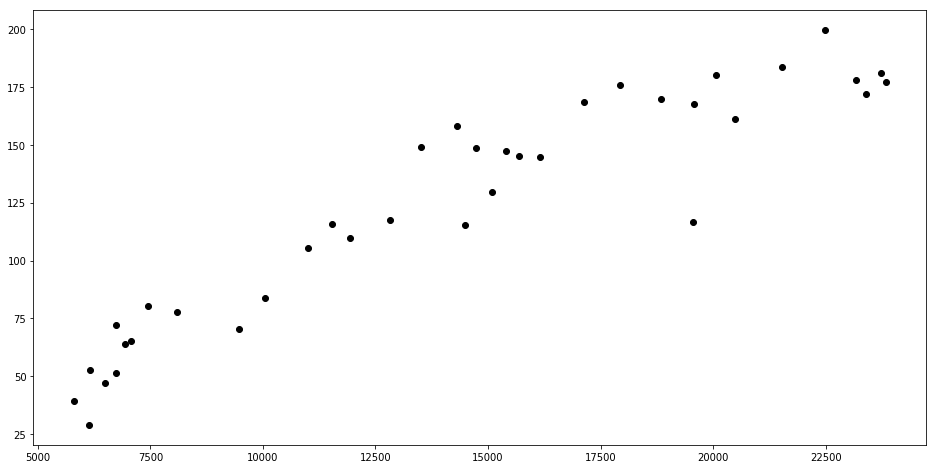

In [92]:
# visualize GDP per capita on Production per capita 
plt.figure(figsize=(16, 8))
plt.scatter(
    data['GDP_pc'],
    data['Prod_pc'],
    c='black'
)

In [93]:
# from above, looks to be logarithmic 
# take ln to linearize
data['GDP_pc_ln'] = np.log(data.GDP_pc)
data['Prod_pc_ln'] = np.log(data.Prod_pc)
data.head()

,year,GDP,Pop,Steel,GDP_pc,Prod_pc,GDP_pc_ln,Prod_pc_ln
0,1980,75244937.47,11178.81699,809000,6731.028653,72.369017,8.814483,4.281778
1,1981,78802559.99,11348.44199,724000,6943.910015,63.797304,8.845620,4.155711
2,1982,70661594.54,11527.27403,334000,6129.948360,28.974760,8.720942,3.366425
3,1983,67980358.79,11714.44195,462000,5803.123963,39.438498,8.666152,3.674742
4,1984,73394748.44,11908.18892,628000,6163.384620,52.736819,8.726381,3.965314


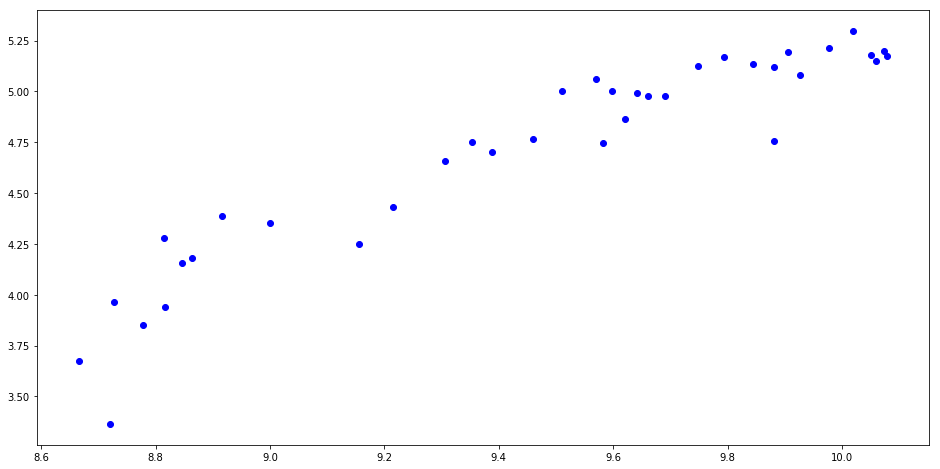

In [94]:
# visualize GDP per capita on Production per capita in ln terms 
plt.figure(figsize=(16, 8))
plt.scatter(
    data['GDP_pc_ln'],
    data['Prod_pc_ln'],
    c='blue'
)

## Regression ----------------------------------------------------------------------------------------------------

In [104]:
# regression using Sci-kit Learn
Xs = data.drop(['GDP','Pop','Steel','GDP_pc','Prod_pc'], axis=1)
y = data['Prod_pc_ln'].values.reshape(-1,1)
# try with one variable
reg = LinearRegression()
reg.fit(Xs[['GDP_pc_ln']], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [105]:
#y = data['Prod_pc_ln'].values.reshape(-1,1)

In [106]:
print(reg.coef_)
print(reg.intercept_)

[[1.04012699]]
[-5.14347772]


In [107]:
# add lag term
data['Prod_pc_ln_lag'] = data['Prod_pc_ln'].shift(periods=1)
data = data.dropna()

In [108]:
# regression with lag term
# regression using Sci-kit Learn
Xlag = data.drop(['GDP','Pop','Steel','GDP_pc','Prod_pc'], axis=1)
y = data['Prod_pc_ln'].values.reshape(-1,1)

In [109]:
reg = LinearRegression()
reg.fit(Xlag[['GDP_pc_ln','Prod_pc_ln_lag']], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [110]:
print(reg.coef_)
print(reg.intercept_)

[[0.82050289 0.21552578]]
[-4.07407254]


In [101]:
Xlag = np.column_stack((data['GDP_pc_ln'], data['Prod_pc_ln_lag']))
predictions = reg.predict(Xlag)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['GDP_pc_ln'],
    data['Prod_pc_ln'],
    c='blue'
)
plt.plot(
    data['GDP_pc_ln'],
    predictions,
    c='red',
    linewidth=2
)
plt.xlabel("GDP_pc_ln")
plt.ylabel("Prod_pc_ln")
plt.show()

ValueError: shapes (36,2) and (3,1) not aligned: 2 (dim 1) != 3 (dim 0)

In [75]:
predictions.shape

(36, 1)

In [60]:
# without lag
X = np.column_stack((data['year'], data['GDP_pc_ln']))
y = data['Prod_pc_ln']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             Prod_pc_ln   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     178.8
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           1.95e-18
Time:                        13:27:04   Log-Likelihood:                 18.366
No. Observations:                  36   AIC:                            -30.73
Df Residuals:                      33   BIC:                            -25.98
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.1418     21.111      3.086      0.0

In [61]:
data['Prod_pc_ln_lag'] = data['Prod_pc_ln'].shift(periods=1)

In [62]:
data.head()

,year,GDP,Pop,Steel,GDP_pc,Prod_pc,GDP_pc_ln,Prod_pc_ln,Prod_pc_ln_lag
1,1981,78802559.99,11348.44199,724000,6943.910015,63.797304,8.845620,4.155711,NaN
2,1982,70661594.54,11527.27403,334000,6129.948360,28.974760,8.720942,3.366425,4.155711
3,1983,67980358.79,11714.44195,462000,5803.123963,39.438498,8.666152,3.674742,3.366425
4,1984,73394748.44,11908.18892,628000,6163.384620,52.736819,8.726381,3.965314,3.674742
5,1985,78613636.43,12107.22507,570000,6493.117620,47.079326,8.778498,3.851834,3.965314


In [111]:
# with lag term
X2 = np.column_stack((data['GDP_pc_ln'], data['Prod_pc_ln_lag']))
y = data['Prod_pc_ln']

X2 = sm.add_constant(X2)
est = sm.OLS(y, X2,missing='drop')
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             Prod_pc_ln   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     128.3
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           5.23e-16
Time:                        14:15:02   Log-Likelihood:                 13.244
No. Observations:                  35   AIC:                            -20.49
Df Residuals:                      32   BIC:                            -15.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0741      1.152     -3.536      0.0

In [64]:
X3 = data.drop(['GDP','Pop','Steel','GDP_pc','Prod_pc','year','Prod_pc_ln'], axis=1)

In [65]:
X3 = data.drop(data.index[0])

In [71]:
y = data['Prod_pc_ln'].values.reshape(-1,1)

In [67]:
reg = LinearRegression()
reg.fit(X3, y)

ValueError: Found input variables with inconsistent numbers of samples: [35, 36]

In [ ]:
print(reg.coef_)
print(reg.intercept_)

In [ ]:
predictions = reg.predict(X3)

In [ ]:
predictions = reg.predict(X3)

plt.figure(figsize=(16, 8))
plt.scatter(
    data['GDP_pc_ln'],
    data['Prod_pc_ln'],
    c='black'
)
plt.plot(
    data['GDP_pc_ln'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()